# Ridge Regression

In [39]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Credit.csv',index_col=0)
print(data.shape)
data.head()

(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
X = data[['Income','Limit','Rating','Student']]
y = data['Balance']

In [7]:
X['Student'] = X['Student'].map({'Yes':1,'No':0})
X.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Income,Limit,Rating,Student
1,14.891,3606,283,0
2,106.025,6645,483,1
3,104.593,7075,514,0
4,148.924,9504,681,0
5,55.882,4897,357,0


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Linear regression (least square fit)
lr = LinearRegression()
lr.fit(X_scaled,y)
print('Intercept is ',lr.intercept_)
print('Coef are ',lr.coef_)

Intercept is  520.0150000000001
Coef are  [-279.65262476  280.51607343  338.48984662  126.80051361]


In [27]:
# Ridge regression 
ridge = Ridge(alpha = 1)
ridge.fit(X_scaled,y)
print('Intercept is ',ridge.intercept_)
print('Coef are ',ridge.coef_)

Intercept is  520.0150000000001
Coef are  [-276.1610234   291.29512888  324.17011678  126.4516386 ]


In [28]:
# we can see for alpha = 1, we are having almost same value, there is very less effect of regularization

In [29]:
#increasing the values of alpha
ridge = Ridge(alpha = 10)
ridge.fit(X_scaled,y)
print('Intercept is ',ridge.intercept_)
print('Coef are ',ridge.coef_)
# see the values decreasing, and moving towards zero

Intercept is  520.0150000000001
Coef are  [-247.2563987   289.09143853  296.87414298  123.05532307]


In [31]:
# Large value of alpha
ridge = Ridge(alpha = 100000)
ridge.fit(X_scaled,y)
print('Intercept is ',ridge.intercept_)
print('Coef are ',ridge.coef_)
# all the values are pretty much close to 0 now. 

Intercept is  520.015
Coef are  [0.83828411 1.56753041 1.57106622 0.47383595]


https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [41]:
alpha = [1e-1,1e1,1e2,1e5,1e7,1e9]
intercept_dict = {}

for a in alpha:
    ridge = Ridge(alpha = a)
    ridge.fit(X_scaled,y)
    intercept_dict[a] = list(ridge.coef_)

In [42]:
tmp = pd.DataFrame(intercept_dict).T
tmp.index = alpha
tmp

,0,1,2,3
1.000000e-01,-279.302308,282.432925,336.217625,126.768867
1.000000e+01,-247.256399,289.091439,296.874143,123.055323
1.000000e+02,-98.926545,210.494675,212.169527,98.060125
1.000000e+05,0.838284,1.567530,1.571066,0.473836
1.000000e+07,0.008515,0.015826,0.015861,0.004757
1.000000e+09,0.000085,0.000158,0.000159,0.000048


Text(0.5, 0, 'Alpha')

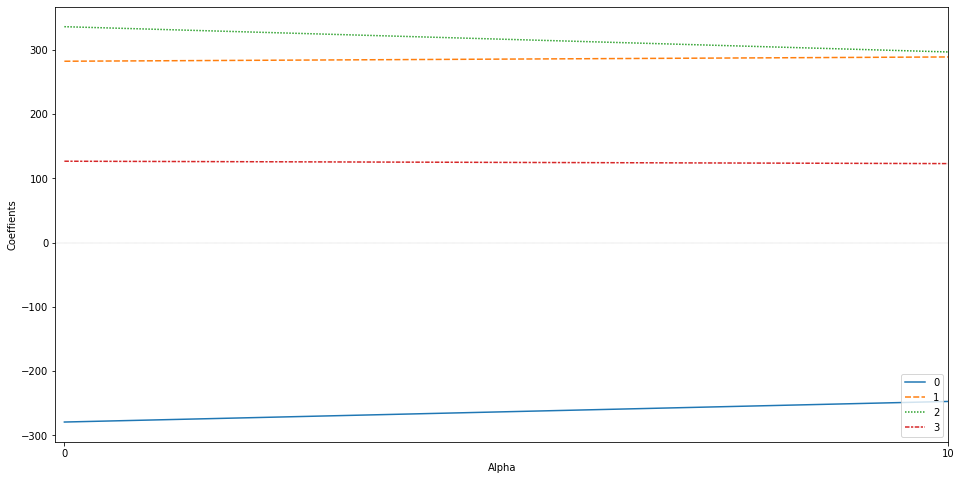

In [61]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xticks(alpha)
plt.xlim(0,10)
plt.ylabel('Coeffients')
plt.xlabel('Alpha')

Text(0.5, 0, 'Alpha')

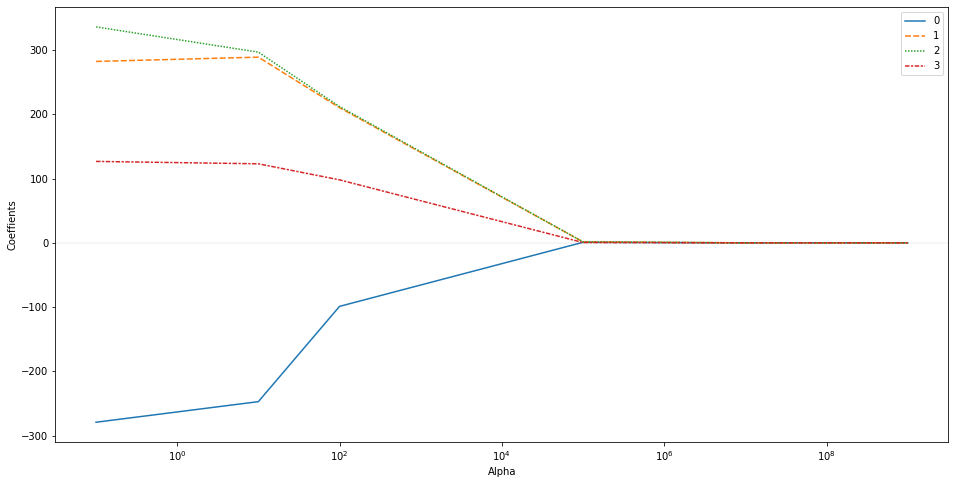

In [65]:
# using log scale for x axis

plt.figure(figsize = (16,8))
sns.lineplot(data = tmp)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xticks(alpha)
plt.xscale('log')
plt.ylabel('Coeffients')
plt.xlabel('Alpha')